In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

Color image has 3 channels 
1.  red
2.  green
3.  blue
4.  each of the channel is itself 2D array encompsed in an outer array to form a 3-channel image.

In [37]:
#playground to generate basic idea of color image

r = np.array([[12,22,44,66,77],
              [44,33,55,99,122],
               [255,250,240,230,255],
               [120,230,120,200,128],
               [120,130,180,190,200]]            ,
              )
g = np.array([[12,22,44,66,77],
              [44,33,55,99,122],
               [255,250,240,230,255],
               [120,230,120,200,128],
               [120,130,180,190,200]]            ,
              )
b = np.array([[12,22,44,66,77],
              [44,33,55,99,122],
               [255,250,240,230,255],
               [120,230,120,200,128],
               [120,130,180,190,200]]            ,
              )
img = np.dstack((r,g,b))
# plt.imshow(img)
img

array([[[ 12,  12,  12],
        [ 22,  22,  22],
        [ 44,  44,  44],
        [ 66,  66,  66],
        [ 77,  77,  77]],

       [[ 44,  44,  44],
        [ 33,  33,  33],
        [ 55,  55,  55],
        [ 99,  99,  99],
        [122, 122, 122]],

       [[255, 255, 255],
        [250, 250, 250],
        [240, 240, 240],
        [230, 230, 230],
        [255, 255, 255]],

       [[120, 120, 120],
        [230, 230, 230],
        [120, 120, 120],
        [200, 200, 200],
        [128, 128, 128]],

       [[120, 120, 120],
        [130, 130, 130],
        [180, 180, 180],
        [190, 190, 190],
        [200, 200, 200]]])

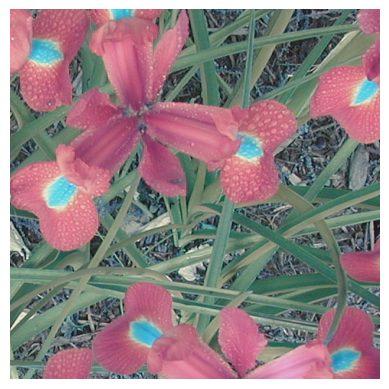

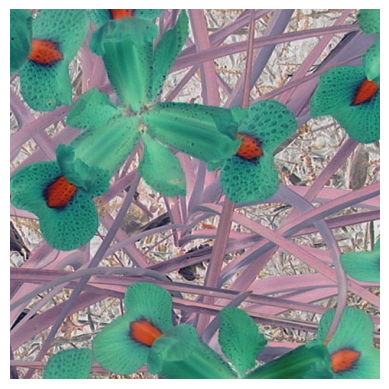

In [4]:
#reading image
img = cv2.imread('./Fig0635(top_ left_flower).tif')
plt.imshow(img); plt.axis('off');
plt.show()
nomalized = img/255
#converting to CMY Model
cmy = 1 - nomalized
plt.imshow(cmy); plt.axis('off'); 
plt.show()

### CMYK Model

k_channel (black) is the 4th dimension. which is calculated based on:

k = min(c,y,m) --> from cmy model image
if k==1 then k_channel at this point is 0 otherwise
k_channel = k


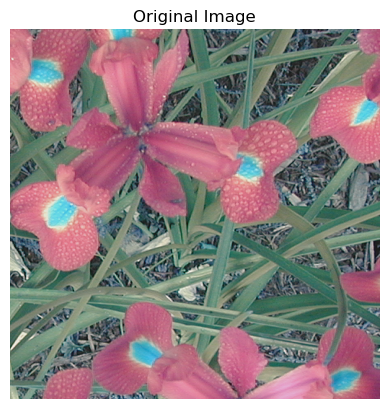

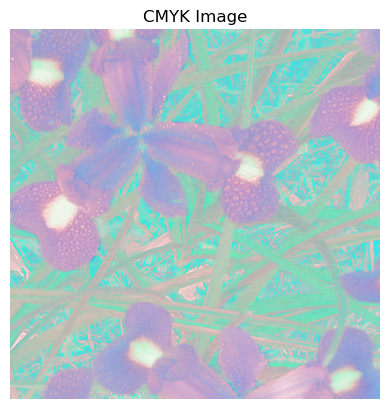

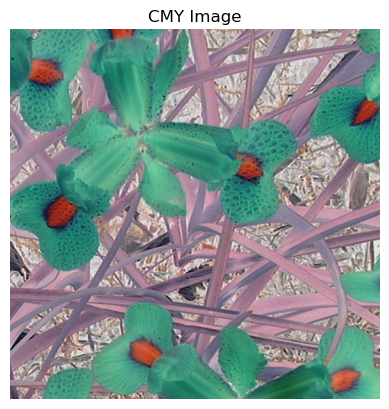

In [9]:
#reaading image
img = cv2.imread('./Fig0635(top_ left_flower).tif')
plt.title('Original Image')
plt.imshow(img); plt.axis('off');
plt.show()

#noralizing image
normalized = img/255
#converting to CMY Model
cmy = 1 - normalized
plt.imshow(cmy), plt.axis('off')
plt.title('CMY Image')
plt.show()

#creating k_channel array
k_channel = np.zeros((normalized.shape[0], normalized.shape[1]))


#calculating k_channel
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        k = min(normalized[i,j,0], normalized[i,j,1], normalized[i,j,2])
        if k == 1:
            k_channel[i,j] = 0
        else:
            k_channel[i,j] = k

result = np.zeros((img.shape[0], img.shape[1], 4))
result[:,:,0] = k_channel
result[:,:,1] = cmy[:,:,0]
result[:,:,2] = cmy[:,:,1]
result[:,:,3] = cmy[:,:,2]
plt.title('CMYK Image')
plt.imshow(result); plt.axis('off');
plt.show()

### YUV model

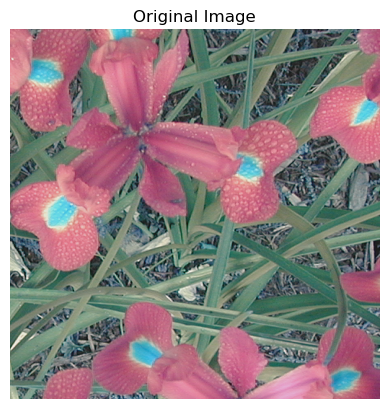

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


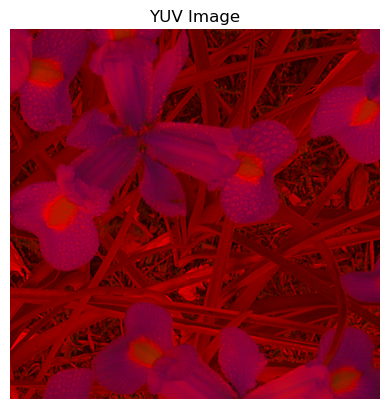

In [13]:
#reading image
img = cv2.imread('./Fig0635(top_ left_flower).tif')
plt.title('Original Image')
plt.imshow(img); plt.axis('off');
plt.show()

#noralizing image
normalized = img/255

result = np.zeros((img.shape[0], img.shape[1], img.shape[2]))

#YUV Model
result[:,:,0] = 0.299*normalized[:,:,0] + 0.587*normalized[:,:,1] + 0.114*normalized[:,:,2]
result[:,:,1] = -0.147*normalized[:,:,0] - 0.289*normalized[:,:,1] + 0.436*normalized[:,:,2]
result[:,:,2] = 0.615*normalized[:,:,0] - 0.515*normalized[:,:,1] - 0.100*normalized[:,:,2]

plt.title('YUV Image')
plt.imshow(result); plt.axis('off');
plt.show()

### YIQ Model

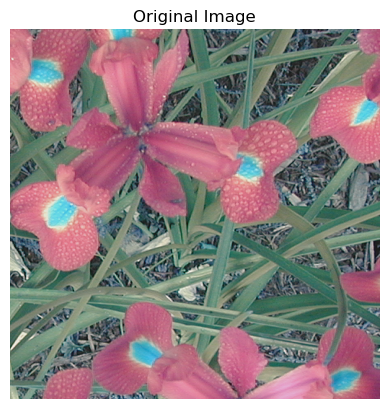

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


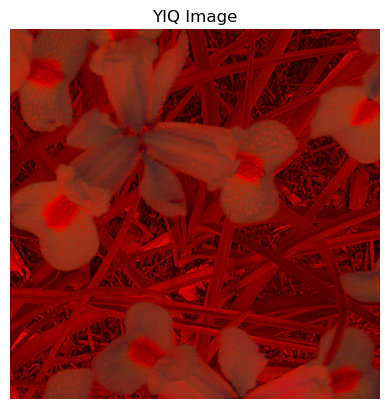

In [14]:
#reading image
img = cv2.imread('./Fig0635(top_ left_flower).tif')
plt.title('Original Image')
plt.imshow(img); plt.axis('off');
plt.show()

result = np.zeros((img.shape[0], img.shape[1], img.shape[2]))

normalized = img/255

#YIQ Model
result[:,:,0] = 0.299*normalized[:,:,0] + 0.587*normalized[:,:,1] + 0.114*normalized[:,:,2]
result[:,:,1] = 0.596*normalized[:,:,0] - 0.274*normalized[:,:,1] - 0.322*normalized[:,:,2]
result[:,:,2] = 0.211*normalized[:,:,0] - 0.523*normalized[:,:,1] + 0.312*normalized[:,:,2]

plt.title('YIQ Image')
plt.imshow(result); plt.axis('off');
plt.show()

### HSI / HSV model
1.  Hue is the angle (change in color channel)
2.  saturation is the outward distance from the center. (represents color purity) 
3.  value/intensity is the brightness concerning the saturation on the color.

4. openCV reads images in bgr model
 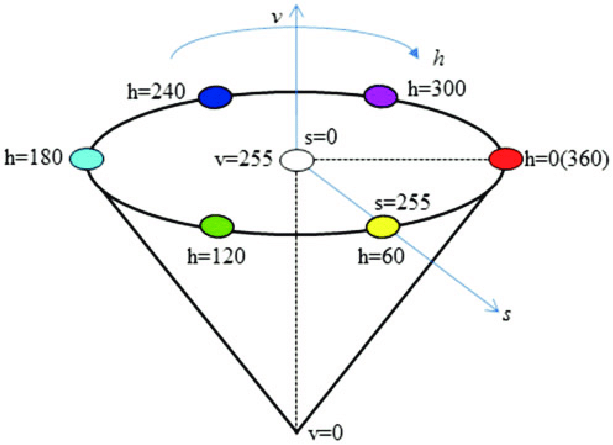
 

### 
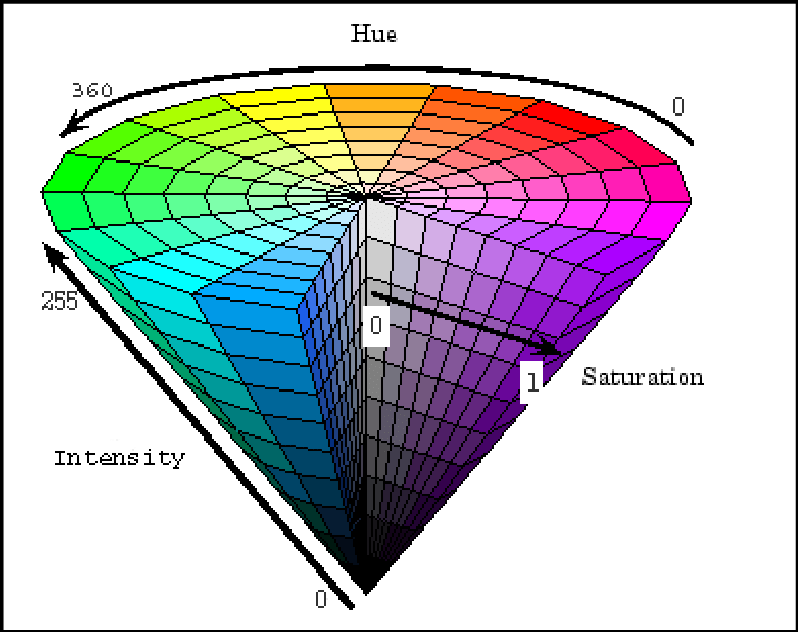

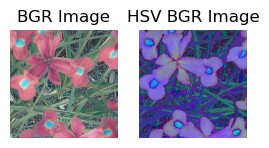

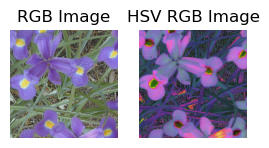

In [30]:
#reading image
bgr = cv2.imread('./Fig0635(top_ left_flower).tif')
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
hsv_rgb = cv2.cvtColor(rgb, cv2.COLOR_HSV2RGB)

plt.subplot(1,4,1)
plt.title('BGR Image')
plt.imshow(bgr); plt.axis('off');

plt.subplot(1,4,2)
plt.title('HSV BGR Image')
plt.imshow(hsv); plt.axis('off');
plt.show()

plt.subplot(1,4,3)
plt.title('RGB Image')
plt.imshow(rgb); plt.axis('off');

plt.subplot(1,4,4)
plt.title('HSV RGB Image')
plt.imshow(hsv_rgb); plt.axis('off');
plt.show()

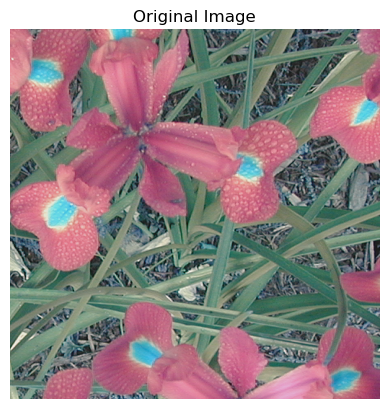

C:\Users\kaleem ullah\AppData\Local\Temp\ipykernel_8072\1718058657.py:14: RuntimeWarning: invalid value encountered in true_divide
  theta = np.arccos((0.5*((normalized[:,:,0] - normalized[:,:,1]) + \
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


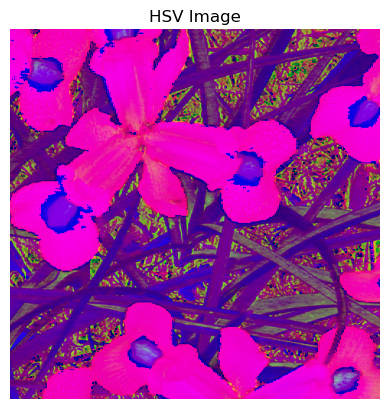

In [16]:
#reading image
img = cv2.imread('./Fig0635(top_ left_flower).tif')
plt.title('Original Image')
plt.imshow(img); plt.axis('off');
plt.show()

#converting to HSV Model
h = np.zeros((img.shape[0], img.shape[1]))
s = np.zeros((img.shape[0], img.shape[1]))
v = np.zeros((img.shape[0], img.shape[1]))

#noralizing image
normalized = img/255

#calculating theta for different cases
theta = np.arccos((0.5*((normalized[:,:,0] - normalized[:,:,1]) + \
    (normalized[:,:,0] - normalized[:,:,2])))/((np.sqrt((normalized[:,:,0] - normalized[:,:,1])**2 + \
    (normalized[:,:,0] - normalized[:,:,2])*(normalized[:,:,1] - normalized[:,:,2])))))

h = np.where(normalized[:,:,2] <= normalized[:,:,1], theta, 2*np.pi - theta)
h = h/(2*np.pi)

s = 1 - 3*np.min(normalized, axis=2)

v = np.max(normalized, axis=2)

result = np.zeros((img.shape[0], img.shape[1], 3))
result[:,:,0] = h
result[:,:,1] = s
result[:,:,2] = v

plt.title('HSV Image')
plt.imshow(result); plt.axis('off');
plt.show()


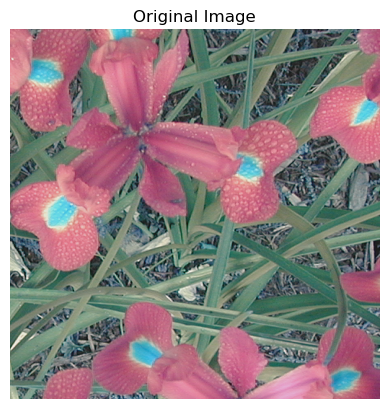

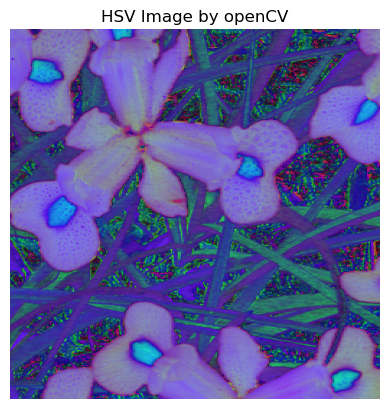

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


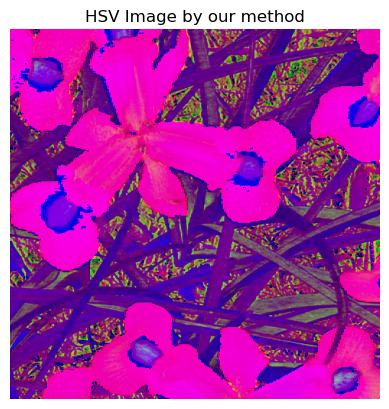

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


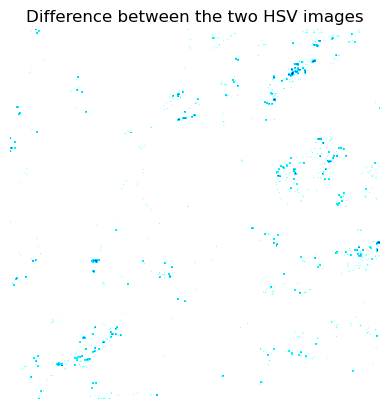

In [18]:
#reading image
img = cv2.imread('./Fig0635(top_ left_flower).tif')
plt.title('Original Image')
plt.imshow(img); plt.axis('off');
plt.show()

#converting to HSV Model using OpenCV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.title('HSV Image by openCV')
plt.imshow(hsv); plt.axis('off');
plt.show()

#showing the previous HSV image
plt.title('HSV Image by our method')
plt.imshow(result); plt.axis('off');
plt.show()

#showing the difference between the two HSV images
plt.title('Difference between the two HSV images')
plt.imshow(hsv - result); plt.axis('off');
plt.show()


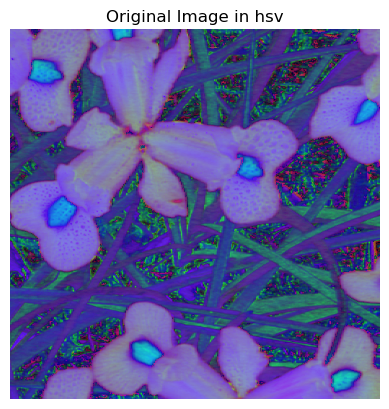

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


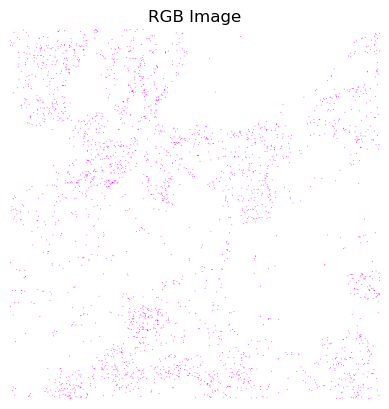

In [21]:
#reading image
img = cv2.imread('./Fig0635(top_ left_flower).tif')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.title('Original Image in hsv')
plt.imshow(hsv); plt.axis('off');
plt.show()

#converting back to RGB
result = np.zeros((img.shape[0], img.shape[1], 3))
result[:,:,0] = hsv[:,:,2]*np.cos(hsv[:,:,0]*2*np.pi)*hsv[:,:,1] + hsv[:,:,2]

result[:,:,1] = hsv[:,:,2]*(1 - hsv[:,:,1])

result[:,:,2] = hsv[:,:,2]*np.sin(hsv[:,:,0]*2*np.pi)*hsv[:,:,1] + hsv[:,:,2]

plt.title('RGB Image')
plt.imshow(result); plt.axis('off');
plt.show()


C:\Users\kaleem ullah\AppData\Local\Temp\ipykernel_8072\3820643034.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  result2[i,j,1] = hsv[i,j,2]*(1 - hsv[i,j,1] + hsv[i,j,1]*hsv[i,j,0]/60)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


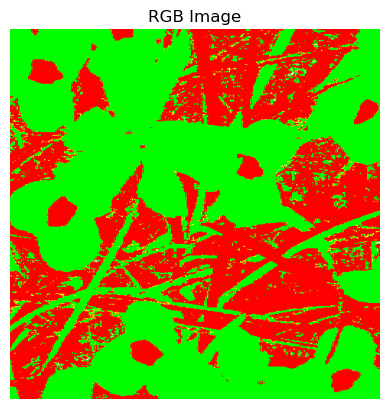

In [24]:
result2 = np.zeros((img.shape[0], img.shape[1], 3))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if hsv[i,j,0] < 60:
            result2[i,j,0] = hsv[i,j,2]
            result2[i,j,1] = hsv[i,j,2]*(1 - hsv[i,j,1] + hsv[i,j,1]*hsv[i,j,0]/60)
            result2[i,j,2] = hsv[i,j,2]*(1 - hsv[i,j,1])
        elif hsv[i,j,0] < 120:
            result2[i,j,0] = hsv[i,j,2]*(1 - hsv[i,j,1] + hsv[i,j,1]*(120 - hsv[i,j,0])/60)
            result2[i,j,1] = hsv[i,j,2]
            result2[i,j,2] = hsv[i,j,2]*(1 - hsv[i,j,1])
        elif hsv[i,j,0] < 180:
            result2[i,j,0] = hsv[i,j,2]*(1 - hsv[i,j,1])
            result2[i,j,1] = hsv[i,j,2]
            result2[i,j,2] = hsv[i,j,2]*(1 - hsv[i,j,1] + hsv[i,j,1]*(hsv[i,j,0] - 120)/60)
        elif hsv[i,j,0] < 240:
            result2[i,j,0] = hsv[i,j,2]*(1 - hsv[i,j,1])
            result2[i,j,1] = hsv[i,j,2]*(1 - hsv[i,j,1] + hsv[i,j,1]*(240 - hsv[i,j,0])/60)
            result2[i,j,2] = hsv[i,j,2]
        elif hsv[i,j,0] < 300:
            result2[i,j,0] = hsv[i,j,2]*(1 - hsv[i,j,1] + hsv[i,j,1]*(hsv[i,j,0] - 240)/60)
            result2[i,j,1] = hsv[i,j,2]*(1 - hsv[i,j,1])
            result2[i,j,2] = hsv[i,j,2]
        else:
            result2[i,j,0] = hsv[i,j,2]
            result2[i,j,1] = hsv[i,j,2]*(1 - hsv[i,j,1])
            result2[i,j,2] = hsv[i,j,2]*(1 - hsv[i,j,1] + hsv[i,j,1]*(360 - hsv[i,j,0])/60)

plt.title('RGB Image')
plt.imshow(result2); plt.axis('off');
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


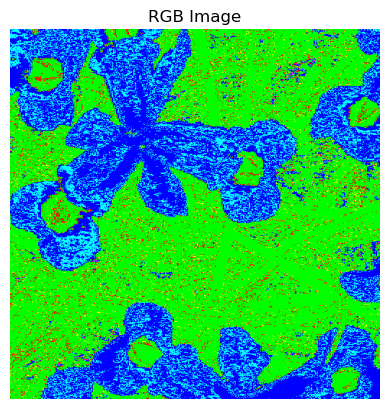

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


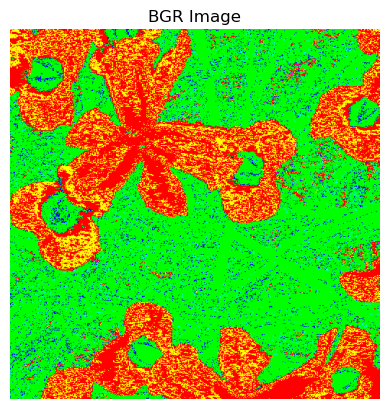

In [27]:
#reading image
img = cv2.imread('./Fig0635(top_ left_flower).tif')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

result2 = np.zeros((img.shape[0], img.shape[1], 3))
blue = np.zeros((img.shape[0], img.shape[1]))
green = np.zeros((img.shape[0], img.shape[1]))
red = np.zeros((img.shape[0], img.shape[1]))


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        h = hsv[i,j,0]
        s = hsv[i,j,1]
        if (hsv[i,j,0] >= 0 and hsv[i,j,0] < 120):
            blue[i,j] = hsv[i,j,2]*(1 - hsv[i,j,1])
            red[i,j] =  hsv[i,j,2] * (1 + (s*np.cos(h))/(np.cos(60 - h)))
            green[i,j] = 1 - (blue[i,j] + red[i,j])
        elif (hsv[i,j,0] >= 120 and hsv[i,j,0] < 240):
            h = h - 120
            red[i,j] = hsv[i,j,2] * (1 - s)
            green[i,j] = 1 + (s*np.cos(h))/(np.cos(60 - h))
            blue[i,j] = 1 - (red[i,j] + green[i,j])
        else:
            h = h - 240
            green[i,j] = hsv[i,j,2] * (1 - s)
            blue[i,j] = 1 + (s*np.cos(h))/(np.cos(60 - h))
            red[i,j] = 1 - (green[i,j] + blue[i,j])

rgb = np.dstack((red, green, blue))
bgr = np.dstack((blue, green, red))
plt.title('RGB Image')
plt.imshow(rgb); plt.axis('off');
plt.show()

plt.title('BGR Image')
plt.imshow(bgr); plt.axis('off');
plt.show()

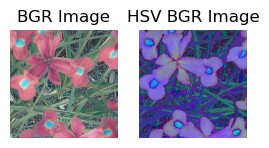

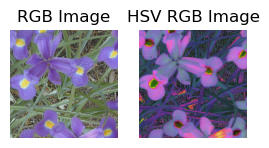

### PseudoColor image processing

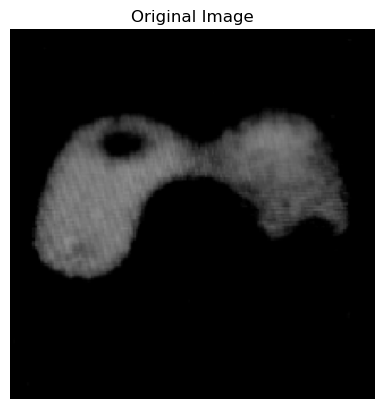

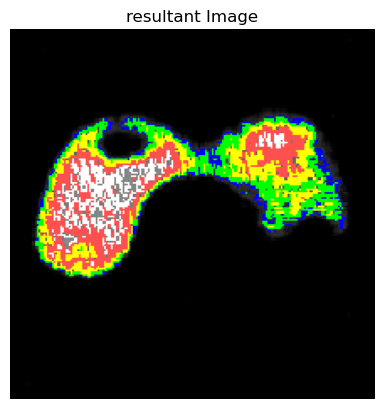

In [20]:
img = cv2.imread('./Fig0620(a)(picker_phantom).tif')
plt.title('Original Image')
plt.imshow(img); plt.axis('off');
plt.show()

result = img.copy()
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if ((img[i,j,0]>100 and img[i,j,0]<120) and (img[i,j,1] >=100 and img[i,j,1]<120) and (img[i,j,2]>=100 and img[i,j,2]<120)):
            result[i,j,0] = 255
            result[i,j,1] = 80
            result[i,j,2] = 80
        if ((img[i,j,0]>120 and img[i,j,0]<130) and (img[i,j,1] >=120 and img[i,j,1]<130) and (img[i,j,2]>=120 and img[i,j,2]<130)):
            result[i,j,0] = 255 
            result[i,j,1] = 255
            result[i,j,2] = 255
        if ((img[i,j,0]>80 and img[i,j,0]<100) and (img[i,j,1] >=80 and img[i,j,1]<100) and (img[i,j,2]>=80 and img[i,j,2]<100)):
            result[i,j,0] = 255 
            result[i,j,1] = 255
            result[i,j,2] = 0
        if ((img[i,j,0]>60 and img[i,j,0]<80) and (img[i,j,1] >=60 and img[i,j,1]<80) and (img[i,j,2]>=60 and img[i,j,2]<80)):
            result[i,j,0] = 0 
            result[i,j,1] = 255
            result[i,j,2] = 0
        if ((img[i,j,0]>=50 and img[i,j,0]<60) and (img[i,j,1] >=50 and img[i,j,1]<60) and (img[i,j,2]>=50 and img[i,j,2]<60)):
            result[i,j,0] = 0 
            result[i,j,1] = 0
            result[i,j,2] = 255
        
plt.title('resultant Image')
plt.imshow(result); plt.axis('off');
plt.show()

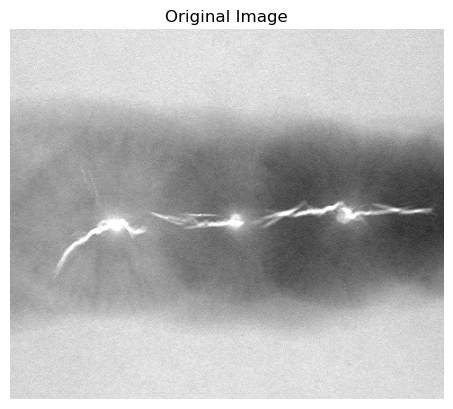

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


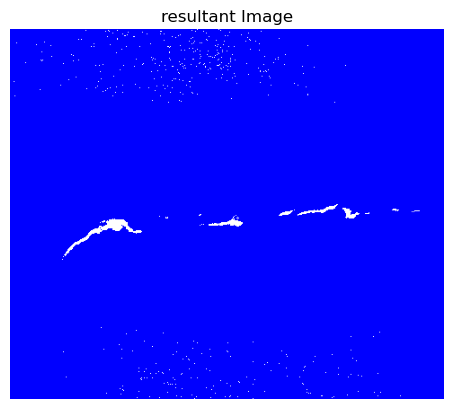

In [34]:
img = cv2.imread('./Fig0621(a)(weld-original).tif')
plt.title('Original Image')
plt.imshow(img); plt.axis('off');
plt.show()
result = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (img[i,j,0] and img[i,j,1] and img[i,j,2])>=0 and (img[i,j,0] and img[i,j,1] and img[i,j,2])<=240:
            result[i,j,0] = 0
            result[i,j,1] = 0
            result[i,j,2] = 255
        else:
            result[i,j,0] = 255
            result[i,j,1] = 255
            result[i,j,2] = 255
plt.title('resultant Image')
plt.imshow(result); plt.axis('off');
plt.show()